# Objective

Compare cross-correlation methods:
- skimage.feature.match_template
- normxcorr

# Params

#### Params are the same for all data in this notebook.

In [36]:
DOWNSAMPLE_FACTOR = 2
KERNEL_SIZE = 150
DISC_RADIUS = 3

pp_params = {
    "input_rescale_factor":   None,
    "input_gaussian_sigma":   None,
    "align_bg_pixel_thresh":  0.25,
    "align_bg_row_thresh":    0.35,
    "align_mask_margin":      0.01,
    "align_cutout_height":    0.75,
    "align_oversub_factor":   1.05,
    "cleanup_wall_margin":    0.05,
    "cleanup_bg_brt_thresh":  0.25,
    "cleanup_bg_grow_factor": 1.0e-2,
    "cleanup_fg_brt_thresh":  0.05,
    "cleanup_fg_grow_factor": 1.0e-2,
    "cleanup_fg_grow_cycles": 4,
    "cleanup_fg_size_thresh": 3.0e-4,
    "cleanup_gaussian_sigma": None,
}

# Results

When cci1pp is used, it matters quite little which cross-correlation was used —  normxcorr or skimage.feature.match_template. However, without cci1pp first, which cross-correlation using skimage.feature.match_template results in more severe undercounting.

Also notably, the slope of all these trendiness is comparable, meaning that in general, adding preprocessing and/or swapping out cross-correlation methods affects images with various numbers of spots equivalently overall.

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
from matplotlib.lines import Line2D


In [4]:
df_gc = pd.read_csv('pred_gt_counts_gc.csv')
df_jv = pd.read_csv('pred_gt_counts_jv.csv')

In [5]:
df_gc.head()

,gt_xs,xs,pp_xs,run_name,lane_no,ts
0,519,443,399,20201217,0,20201217-142717
1,568,457,394,20201217,2,20201217-142717
2,674,555,575,20201217,4,20201217-142717
3,410,320,190,20201217,5,20201217-142717
4,46,96,33,20201216,1,20201216-163816


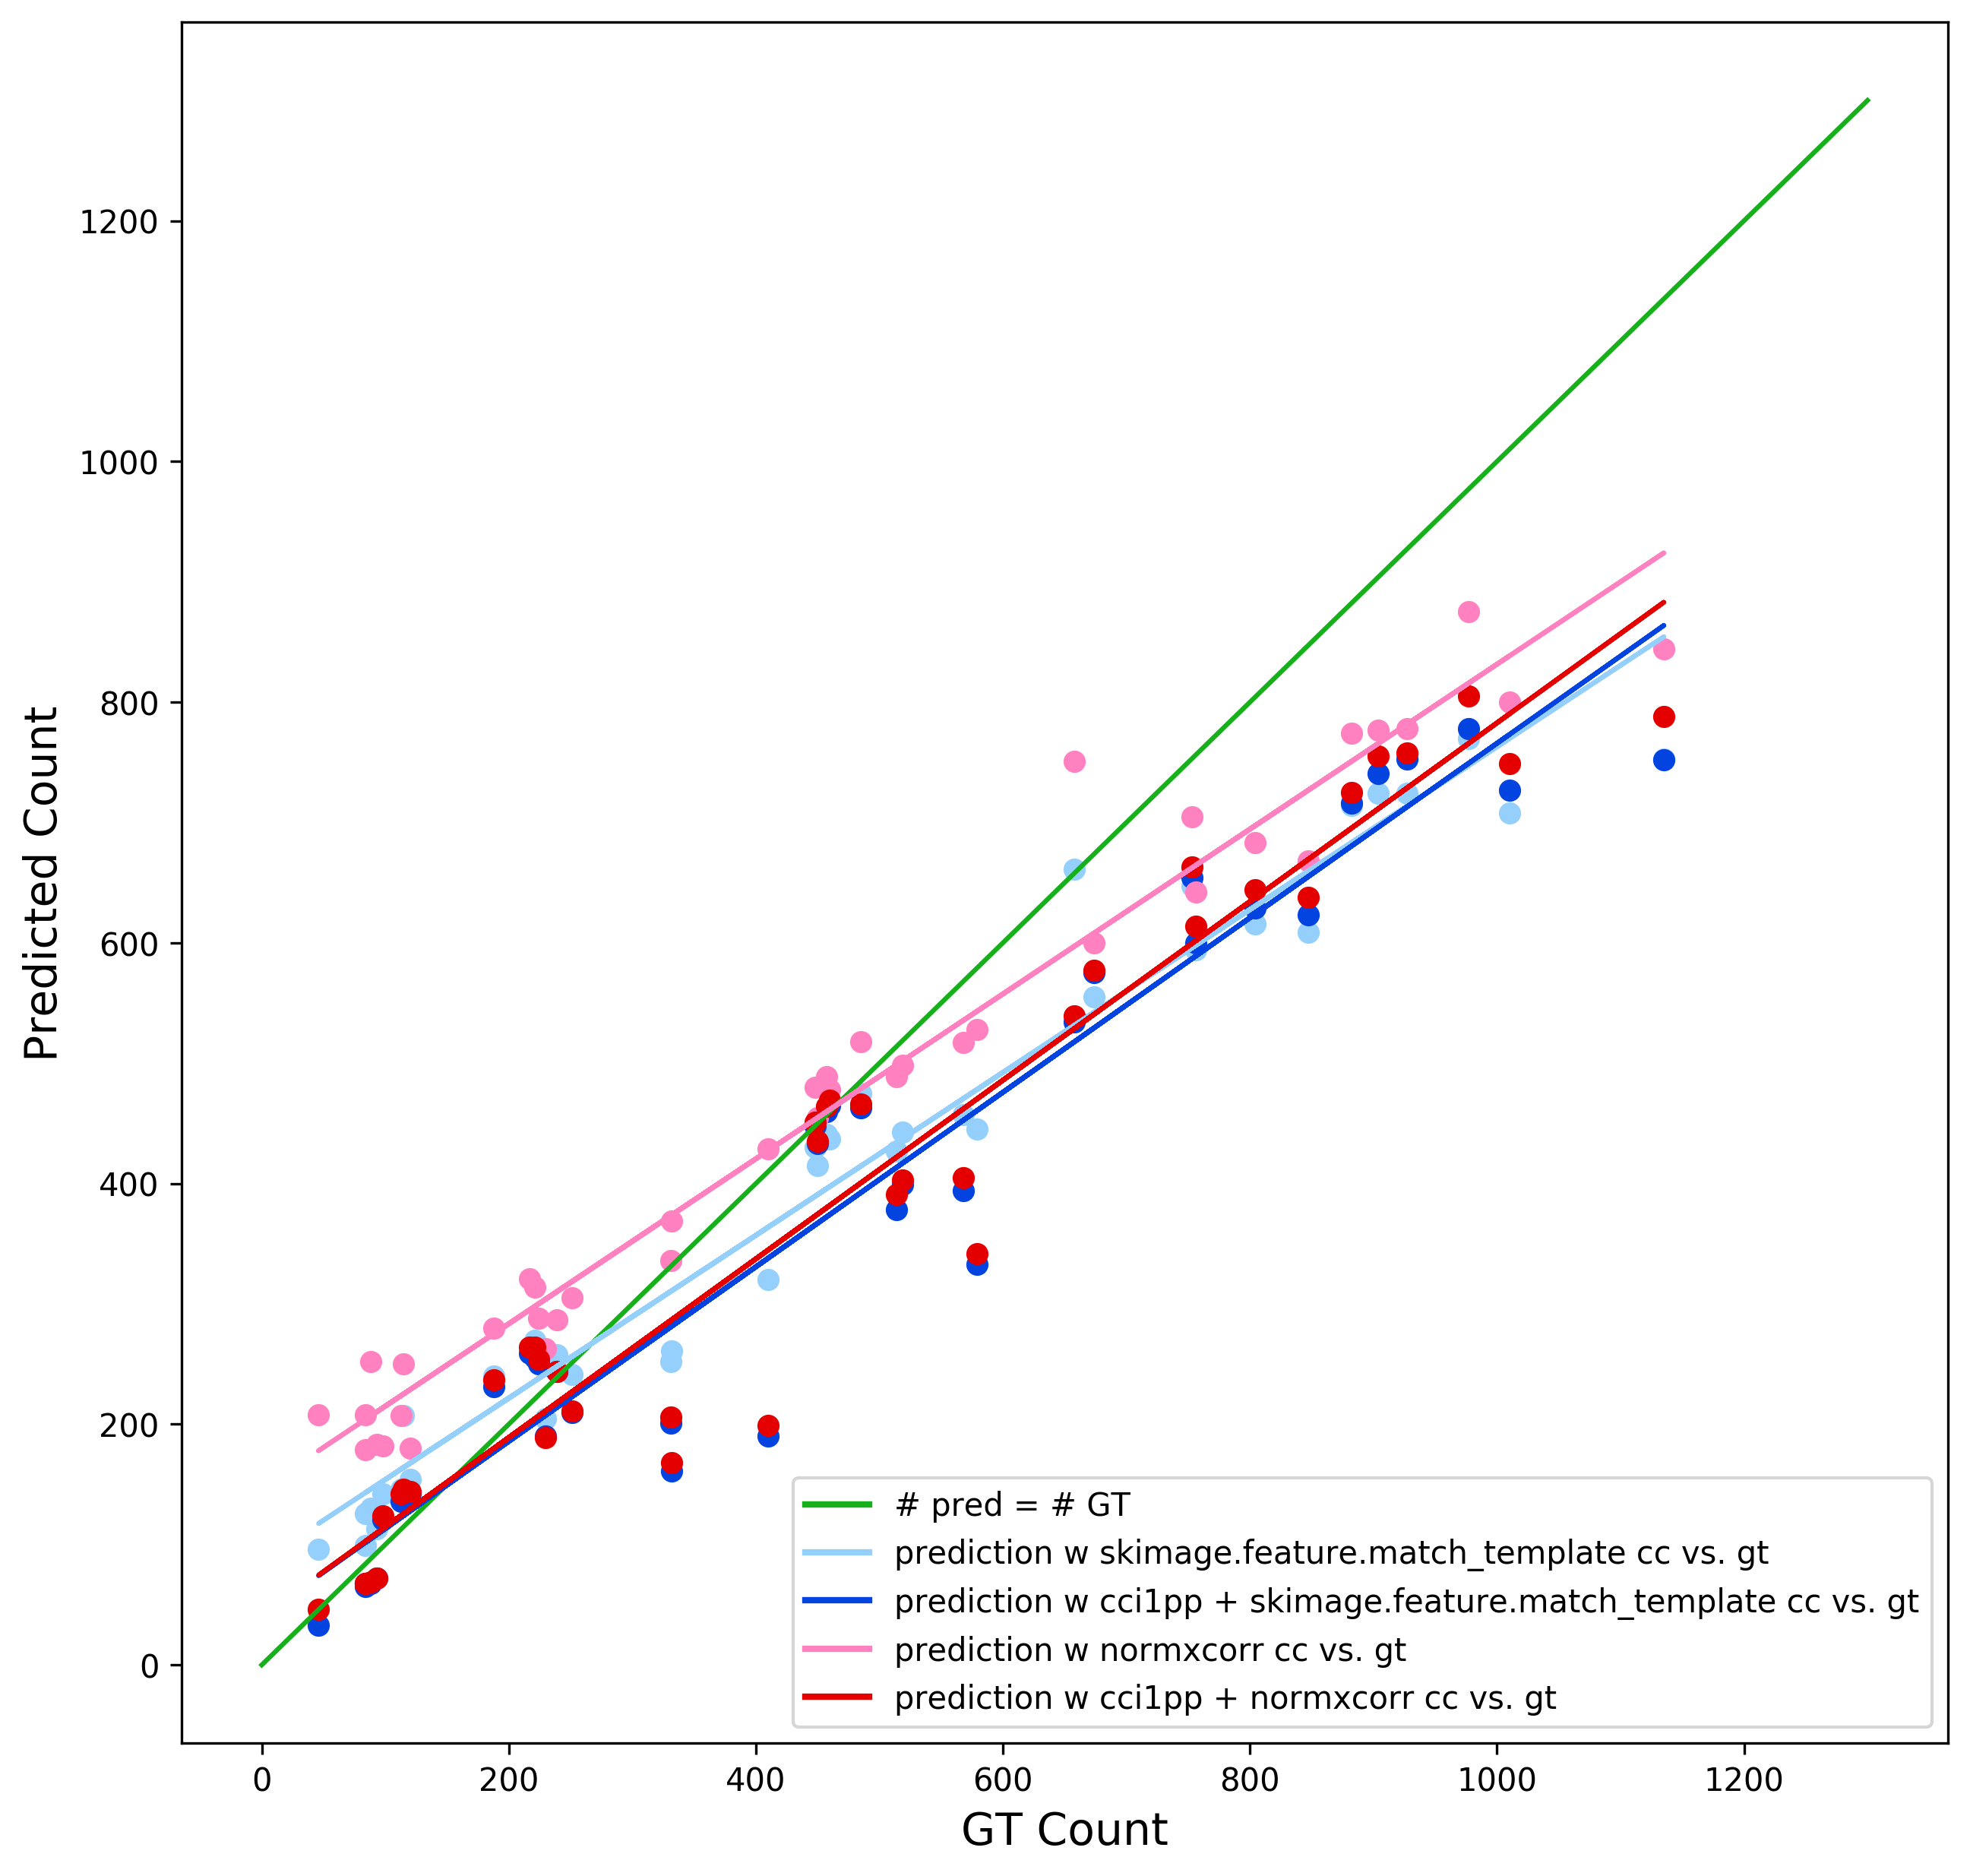

In [35]:
plt.figure(figsize=(10,10), dpi=300)
plt.plot([0, 1300], [0, 1300], color='xkcd:green')

plt.scatter(df_gc['gt_xs'], df_gc['xs'], facecolor='xkcd:light blue')
slope, intercept, r_value, p_value, std_err = linregress(df_gc['gt_xs'], df_gc['xs'])
plt.plot(df_gc['gt_xs'], intercept + [slope*x for x in df_gc['gt_xs']], color='xkcd:light blue')

plt.scatter(df_gc['gt_xs'], df_gc['pp_xs'], facecolor='xkcd:blue')
slope, intercept, r_value, p_value, std_err = linregress(df_gc['gt_xs'], df_gc['pp_xs'])
plt.plot(df_gc['gt_xs'], intercept + [slope*x for x in df_gc['gt_xs']], color='xkcd:blue')

plt.scatter(df_jv['gt_xs'], df_jv['xs'], facecolor='xkcd:pink')
slope, intercept, r_value, p_value, std_err = linregress(df_jv['gt_xs'], df_jv['xs'])
plt.plot(df_gc['gt_xs'], intercept + [slope*x for x in df_jv['gt_xs']], color='xkcd:pink')

plt.scatter(df_jv['gt_xs'], df_jv['pp_xs'], facecolor='xkcd:red')
slope, intercept, r_value, p_value, std_err = linregress(df_jv['gt_xs'], df_jv['pp_xs'])
plt.plot(df_jv['gt_xs'], intercept + [slope*x for x in df_jv['gt_xs']], color='xkcd:red')


handle_list = []
handle_list.append(Line2D([0],[0], marker=None, color='xkcd:green', lw=2, label='# pred = # GT'))
handle_list.append(Line2D([0],[0], marker=None, color='xkcd:light blue', lw=2, label='prediction w skimage.feature.match_template cc vs. gt'))
handle_list.append(Line2D([0],[0], marker=None, color='xkcd:blue', lw=2, label='prediction w cci1pp + skimage.feature.match_template cc vs. gt'))
handle_list.append(Line2D([0],[0], marker=None, color='xkcd:pink', lw=2, label='prediction w normxcorr cc vs. gt'))
handle_list.append(Line2D([0],[0], marker=None, color='xkcd:red', lw=2, label='prediction w cci1pp + normxcorr cc vs. gt'))

plt.legend(handles=handle_list, loc='lower right', fontsize=10)

plt.xlabel('GT Count', fontsize=14)
plt.ylabel('Predicted Count', fontsize=14)
plt.show()